In [ ]:
import os
import shutil

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


Prepareing The Data set


In [ ]:
data_dir = '/content/drive/My Drive/table and glass'
# os.mkdir(data_dir)
train_dir = '/content/drive/My Drive/table and glass/training'
# os.mkdir(train_dir)
test_dir = '/content/drive/My Drive/table and glass/testing'
# os.mkdir(test_dir)

train_g_dir = '/content/drive/My Drive/table and glass/training/glass'
# os.mkdir(train_g_dir)
train_t_dir  = "/content/drive/My Drive/table and glass/training/table"
# os.mkdir(train_t_dir)
test_g_dir = "/content/drive/My Drive/table and glass/testing/glass"
# os.mkdir(test_g_dir)
test_t_dir = "/content/drive/My Drive/table and glass/testing/table"
# os.mkdir(test_t_dir)
val_dir = os.path.join(data_dir, "validation")
# os.mkdir(val_dir)
val_g_dir = os.path.join(val_dir,"glass")
# os.mkdir(val_g_dir)
val_t_dir = os.path.join(val_dir,"table")
# os.mkdir(val_t_dir)

In [ ]:


fnames = ['glass_{}.jpg'.format(i) for i in range(1, 3201)]
for fname in fnames:
  src = os.path.join('/content/drive/My Drive/table and glass/training/training', fname)
  dst = os.path.join(train_g_dir, fname)
  shutil.move(src, dst)

fnames = ['table_{}.jpg'.format(i) for i in range(1, 3201)]
for fname in fnames:
  src = os.path.join('/content/drive/My Drive/table and glass/training/training', fname)
  dst = os.path.join(train_t_dir, fname)
  shutil.move(src, dst)



In [ ]:
fnames = ['glass_{}.jpg'.format(i) for i in range(3201,3892)]
for fname in fnames:
  src = os.path.join("/content/drive/My Drive/table and glass/testing/testing", fname)
  dst = os.path.join(test_g_dir, fname)
  shutil.move(src, dst)

fnames = ['table_{}.jpg'.format(i) for i in range(3201,3753 )]
for fname in fnames:
  src = os.path.join('/content/drive/My Drive/table and glass/testing/testing', fname)
  dst = os.path.join(test_t_dir, fname)
  shutil.move(src, dst)

In [ ]:
glass = ['glass_{}.jpg'.format(i) for i in range(1, 3201)]
table = ['table_{}.jpg'.format(i) for i in range(1, 3201)]

val_glass = glass[ int(len(glass) * .8) + 1 : ]
val_table = table[int(len(table) * .8) + 1 : ]


for fname in val_glass:
  src = os.path.join(train_g_dir, fname)
  dst = os.path.join(val_g_dir, fname)
  shutil.move(src, dst)

for fname in val_table:
  src = os.path.join(train_t_dir, fname)
  dst = os.path.join(val_t_dir, fname)
  shutil.move(src, dst)

Creating The Model

In [ ]:
from keras.models import Model
from keras.layers import SeparableConv2D , Dense , Flatten ,MaxPooling2D , Dropout , BatchNormalization
from keras import Input

In [ ]:
inp = Input(shape=(250,250,3))
x1 = SeparableConv2D(32,3,activation="relu")(inp)
x2 = SeparableConv2D(16 , 3, activation= "relu")(x1)
x3 = MaxPooling2D((2,2))(x2)
x4 = BatchNormalization()(x3)
x5 = Flatten()(x4)
x6 = Dropout(0.2)(x5)
x7 = Dense(16,activation='relu')(x6)
x8 = Dropout(0.2)(x7)
x9 = Dense(8 , activation = "relu")(x8)
output = Dense(1,activation="sigmoid")(x9)
model_1 = Model(inp ,  output)
model_1.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 248, 248, 32)      155       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 246, 246, 16)      816       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 123, 123, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 123, 123, 16)      64        
_________________________________________________________________
flatten (Flatten)            (None, 242064)            0         
_________________________________________________________________
dropout (Dropout)            (None, 242064)           

288

Configuring the model for training



In [ ]:
from keras import optimizers

model_1.compile(loss='binary_crossentropy' ,
              optimizer=optimizers.RMSprop(lr=1e-4),metrics=['accuracy'])

Using ImageDataGenerator to read images from directories


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1./ 255 , rotation_range=40 , width_shift_range=0.2 ,
                                   height_shift_range = 0.2 , shear_range= 0.2 , zoom_range= 0.2
                                   , horizontal_flip = True )
test_datagen = ImageDataGenerator(rescale= 1./ 255)


train_genrator = train_datagen.flow_from_directory(train_dir , target_size= (250 ,250) ,
                                  class_mode='binary', batch_size=20 )
validation_genrator = test_datagen.flow_from_directory(val_dir,target_size=( 250 ,250),
                                                       class_mode='binary' , batch_size= 20  )


Found 5122 images belonging to 2 classes.
Found 1278 images belonging to 2 classes.


In [ ]:
5122/ 51


100.43137254901961

In [ ]:
history_1 = model_1.fit_generator(train_genrator , steps_per_epoch= 51 , epochs = 10 , validation_data= validation_genrator , validation_steps= 50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
51/51 [==============================] - ETA: 0s - loss: 0.6587 - accuracy: 0.6961 

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


51/51 [==============================] - 1701s 33s/step - loss: 0.6587 - accuracy: 0.6961 - val_loss: 0.6578 - val_accuracy: 0.7200
Epoch 2/10
42/51 [=======================>......] - ETA: 2:04 - loss: 0.5493 - accuracy: 0.7512

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


51/51 [==============================] - 900s 18s/step - loss: 0.5429 - accuracy: 0.7539 - val_loss: 0.6643 - val_accuracy: 0.6250
Epoch 3/10
51/51 [==============================] - 622s 12s/step - loss: 0.5859 - accuracy: 0.7206 - val_loss: 0.6540 - val_accuracy: 0.6740
Epoch 4/10
51/51 [==============================] - 478s 9s/step - loss: 0.5334 - accuracy: 0.7588 - val_loss: 0.6669 - val_accuracy: 0.7080
Epoch 5/10
51/51 [==============================] - 384s 8s/step - loss: 0.5163 - accuracy: 0.7725 - val_loss: 0.6378 - val_accuracy: 0.6880
Epoch 6/10
51/51 [==============================] - 309s 6s/step - loss: 0.4954 - accuracy: 0.7645 - val_loss: 0.6094 - val_accuracy: 0.7370
Epoch 7/10
51/51 [==============================] - 256s 5s/step - loss: 0.5107 - accuracy: 0.7627 - val_loss: 0.5829 - val_accuracy: 0.7230
Epoch 8/10
51/51 [==============================] - 232s 5s/step - loss: 0.5105 - accuracy: 0.7706 - val_loss: 0.5534 - val_accuracy: 0.7810
Epoch 9/10
51/51 [====

In [ ]:
history_1 = model_1.fit_generator(train_genrator , steps_per_epoch= 51 , epochs = 10 , validation_data= validation_genrator , validation_steps= 50)

Epoch 1/10
51/51 [==============================] - ETA: 0s - loss: 0.4988 - accuracy: 0.7804

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


51/51 [==============================] - 112s 2s/step - loss: 0.4988 - accuracy: 0.7804 - val_loss: 0.4881 - val_accuracy: 0.7460
Epoch 2/10
51/51 [==============================] - 108s 2s/step - loss: 0.5172 - accuracy: 0.7495 - val_loss: 0.4496 - val_accuracy: 0.8170
Epoch 3/10
51/51 [==============================] - 100s 2s/step - loss: 0.4854 - accuracy: 0.7854 - val_loss: 0.3722 - val_accuracy: 0.8540
Epoch 4/10
51/51 [==============================] - 82s 2s/step - loss: 0.4737 - accuracy: 0.7922 - val_loss: 0.4217 - val_accuracy: 0.8050
Epoch 5/10
50/51 [============================>.] - ETA: 1s - loss: 0.4656 - accuracy: 0.7730

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


51/51 [==============================] - 91s 2s/step - loss: 0.4654 - accuracy: 0.7735 - val_loss: 0.3908 - val_accuracy: 0.8290
Epoch 6/10
51/51 [==============================] - 81s 2s/step - loss: 0.4800 - accuracy: 0.7863 - val_loss: 0.3707 - val_accuracy: 0.8430
Epoch 7/10
51/51 [==============================] - 73s 1s/step - loss: 0.4684 - accuracy: 0.7912 - val_loss: 0.4690 - val_accuracy: 0.7650
Epoch 8/10
51/51 [==============================] - 71s 1s/step - loss: 0.4636 - accuracy: 0.7853 - val_loss: 0.3223 - val_accuracy: 0.8700
Epoch 9/10
51/51 [==============================] - 67s 1s/step - loss: 0.4611 - accuracy: 0.8039 - val_loss: 0.3103 - val_accuracy: 0.8800
Epoch 10/10
51/51 [==============================] - 62s 1s/step - loss: 0.4651 - accuracy: 0.7853 - val_loss: 0.3696 - val_accuracy: 0.8600


In [ ]:
history_1 = model_1.fit_generator(train_genrator , steps_per_epoch= 51 , epochs = 10 , validation_data= validation_genrator , validation_steps= 50)

Epoch 1/10
51/51 [==============================] - ETA: 0s - loss: 0.4475 - accuracy: 0.7984

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


51/51 [==============================] - 60s 1s/step - loss: 0.4475 - accuracy: 0.7984 - val_loss: 0.3572 - val_accuracy: 0.8500
Epoch 2/10
51/51 [==============================] - 57s 1s/step - loss: 0.4734 - accuracy: 0.7755 - val_loss: 0.4362 - val_accuracy: 0.8110
Epoch 3/10
51/51 [==============================] - 58s 1s/step - loss: 0.4378 - accuracy: 0.8157 - val_loss: 0.6093 - val_accuracy: 0.7850
Epoch 4/10
51/51 [==============================] - 54s 1s/step - loss: 0.4009 - accuracy: 0.8137 - val_loss: 0.3849 - val_accuracy: 0.8410
Epoch 5/10
51/51 [==============================] - 52s 1s/step - loss: 0.4067 - accuracy: 0.8333 - val_loss: 0.3196 - val_accuracy: 0.8810
Epoch 6/10
51/51 [==============================] - 51s 999ms/step - loss: 0.4187 - accuracy: 0.8176 - val_loss: 0.3188 - val_accuracy: 0.8720
Epoch 7/10
16/51 [========>.....................] - ETA: 24s - loss: 0.4172 - accuracy: 0.8125

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


51/51 [==============================] - 54s 1s/step - loss: 0.4030 - accuracy: 0.8196 - val_loss: 0.3638 - val_accuracy: 0.8630
Epoch 8/10
51/51 [==============================] - 51s 991ms/step - loss: 0.4027 - accuracy: 0.8255 - val_loss: 0.4440 - val_accuracy: 0.8370
Epoch 9/10
51/51 [==============================] - 52s 1s/step - loss: 0.4045 - accuracy: 0.8224 - val_loss: 0.3344 - val_accuracy: 0.8700
Epoch 10/10
51/51 [==============================] - 50s 989ms/step - loss: 0.4239 - accuracy: 0.8127 - val_loss: 0.3504 - val_accuracy: 0.8780


In [ ]:
history_1 = model_1.fit_generator(train_genrator , steps_per_epoch= 51 , epochs = 10 , validation_data= validation_genrator , validation_steps= 50)

Epoch 1/10
16/51 [========>.....................] - ETA: 23s - loss: 0.4264 - accuracy: 0.8000

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


51/51 [==============================] - 49s 969ms/step - loss: 0.4135 - accuracy: 0.8194 - val_loss: 0.3641 - val_accuracy: 0.8590
Epoch 2/10
51/51 [==============================] - ETA: 0s - loss: 0.4271 - accuracy: 0.8206

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


51/51 [==============================] - 51s 1s/step - loss: 0.4271 - accuracy: 0.8206 - val_loss: 0.5847 - val_accuracy: 0.8080
Epoch 3/10
51/51 [==============================] - 50s 988ms/step - loss: 0.4240 - accuracy: 0.8137 - val_loss: 0.4229 - val_accuracy: 0.8460
Epoch 4/10
51/51 [==============================] - 52s 1s/step - loss: 0.4038 - accuracy: 0.8265 - val_loss: 0.3913 - val_accuracy: 0.8610
Epoch 5/10
51/51 [==============================] - 50s 989ms/step - loss: 0.4009 - accuracy: 0.8206 - val_loss: 0.3299 - val_accuracy: 0.8820
Epoch 6/10
51/51 [==============================] - 50s 982ms/step - loss: 0.3959 - accuracy: 0.8373 - val_loss: 0.2962 - val_accuracy: 0.8880
Epoch 7/10
51/51 [==============================] - 51s 996ms/step - loss: 0.4028 - accuracy: 0.8275 - val_loss: 0.3538 - val_accuracy: 0.8750
Epoch 8/10
51/51 [==============================] - 49s 969ms/step - loss: 0.3963 - accuracy: 0.8283 - val_loss: 0.3362 - val_accuracy: 0.8740
Epoch 9/10
51/51

In [ ]:
history_1 = model_1.fit_generator(train_genrator , steps_per_epoch= 51 , epochs = 10 , validation_data= validation_genrator , validation_steps= 50)

Epoch 1/10
51/51 [==============================] - ETA: 0s - loss: 0.4132 - accuracy: 0.8196

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


51/51 [==============================] - 50s 983ms/step - loss: 0.4132 - accuracy: 0.8196 - val_loss: 0.3461 - val_accuracy: 0.8810
Epoch 2/10
51/51 [==============================] - 49s 966ms/step - loss: 0.3782 - accuracy: 0.8373 - val_loss: 0.4872 - val_accuracy: 0.8440
Epoch 3/10
24/51 [=============>................] - ETA: 18s - loss: 0.4376 - accuracy: 0.8375

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


51/51 [==============================] - 51s 996ms/step - loss: 0.4177 - accuracy: 0.8304 - val_loss: 0.3252 - val_accuracy: 0.8890
Epoch 4/10
51/51 [==============================] - 51s 996ms/step - loss: 0.4146 - accuracy: 0.8324 - val_loss: 0.3611 - val_accuracy: 0.8590
Epoch 5/10
51/51 [==============================] - 50s 981ms/step - loss: 0.3972 - accuracy: 0.8245 - val_loss: 0.6515 - val_accuracy: 0.7760
Epoch 6/10
51/51 [==============================] - 51s 1s/step - loss: 0.3655 - accuracy: 0.8392 - val_loss: 0.3228 - val_accuracy: 0.8830
Epoch 7/10
51/51 [==============================] - 49s 961ms/step - loss: 0.4199 - accuracy: 0.8216 - val_loss: 0.3678 - val_accuracy: 0.8690
Epoch 8/10
51/51 [==============================] - 49s 959ms/step - loss: 0.3753 - accuracy: 0.8265 - val_loss: 0.5213 - val_accuracy: 0.8240
Epoch 9/10
51/51 [==============================] - 49s 962ms/step - loss: 0.4106 - accuracy: 0.8084 - val_loss: 0.3773 - val_accuracy: 0.8630
Epoch 10/10
5

In [ ]:
history_1 = model_1.fit_generator(train_genrator , steps_per_epoch= 51 , epochs = 10 , validation_data= validation_genrator , validation_steps= 50)

In [ ]:
# inp = Input(shape=(250,250,3))
# x1 = SeparableConv2D(32,3,activation="relu")(inp)
# x2 = SeparableConv2D(16 , 3, activation= "relu")(x1)
# x3 = MaxPooling2D((2,2))(x2)
# x4 = BatchNormalization()(x3)
# x5 = Flatten()(x4)
# x6 = Dropout(0.2)(x5)
# x7 = Dense(16,activation='relu')(x6)
# x8 = Dropout(0.2)(x7)
# x9 = Dense(8 , activation = "relu")(x8)
# output = Dense(1,activation="sigmoid")(x9)
# model_1 = Model(inp ,  output)
# model_1.summary()

inp = Input(shape=(250,250,3))
x1 = SeparableConv2D(32,3,activation="relu")(inp)
x2 = SeparableConv2D(16 , 3, activation= "relu")(x1)
x2 = SeparableConv2D(8 , 3, activation= "relu")(x2)
x3 = MaxPooling2D((2,2))(x2)
x4 = BatchNormalization()(x3)
x5 = Flatten()(x4)
x6 = Dropout(0.2)(x5)
x7 = Dense(16,activation='relu')(x6)
x8 = Dropout(0.2)(x7)
x9 = Dense(8 , activation = "relu")(x8)
output = Dense(1,activation="sigmoid")(x9)
model_2 = Model(inp ,  output)
model_2.summary()

# inp = Input(shape=(250,250,3))
# x1 = SeparableConv2D(32,3,activation="relu")(inp)
# x1 = BatchNormalization()(x1)
# x2 = SeparableConv2D(16 , 3, activation= "relu")(x1)
# x2 = BatchNormalization()(x2)
# x3 = MaxPooling2D((2,2))(x2)
# x4 = BatchNormalization()(x3)
# x5 = Flatten()(x4)
# x6 = Dropout(0.2)(x5)
# x7 = Dense(8,activation='relu')(x6)



# output = Dense(1,activation="sigmoid")(x7)
# model_2 = Model(inp ,  output)
# model_2.summary()

model_2.compile(loss = 'binary_crossentropy',metrics=['accuracy'])

history_2 = model_2.fit_generator(train_genrator,steps_per_epoch=80,epochs=10,validation_data=validation_genrator,validation_steps=80)

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
separable_conv2d_17 (Separab (None, 248, 248, 32)      155       
_________________________________________________________________
separable_conv2d_18 (Separab (None, 246, 246, 16)      816       
_________________________________________________________________
separable_conv2d_19 (Separab (None, 244, 244, 8)       280       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 122, 122, 8)       0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 122, 122, 8)       32        
_________________________________________________________________
flatten_6 (Flatten)          (None, 119072)          

UnknownError: ignored

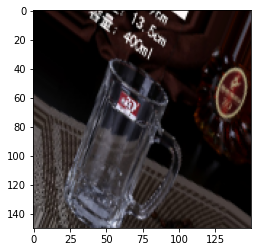

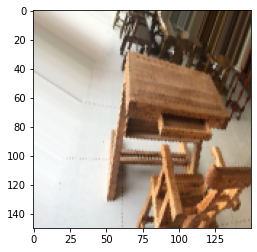

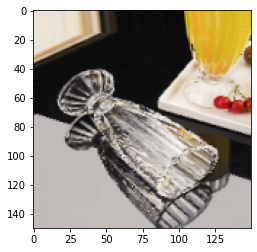

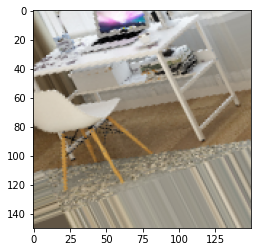

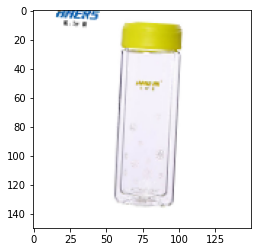

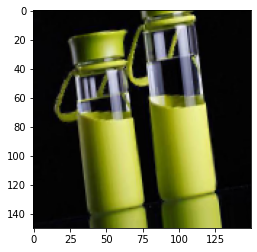

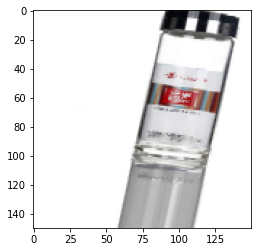

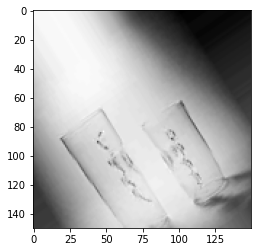

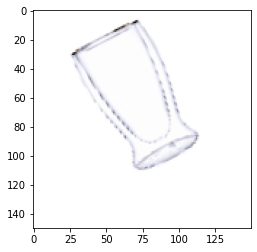

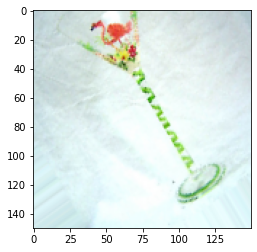

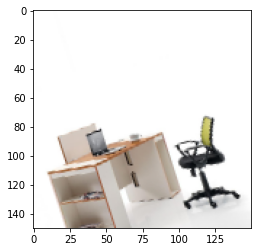

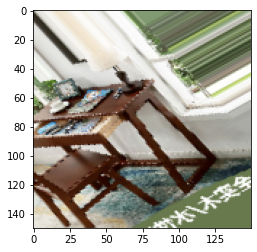

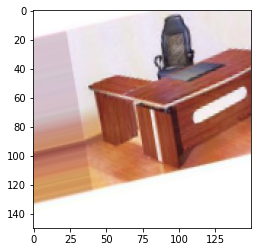

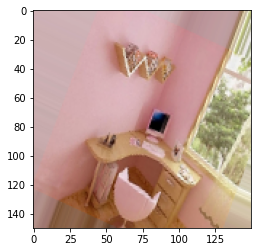

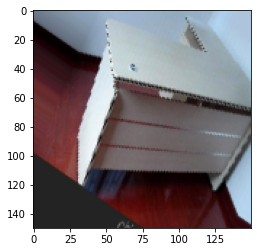

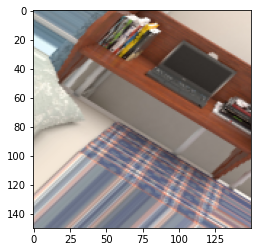

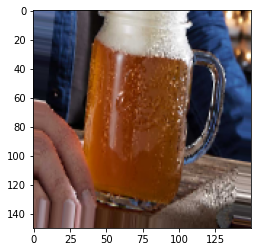

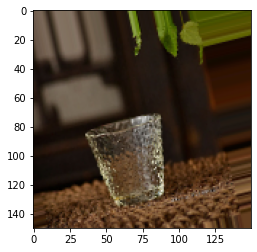

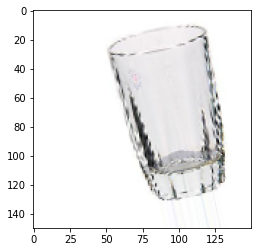

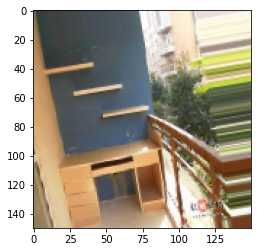

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
a = train_genrator[0]
for s in a[0]:
  imgplot = plt.imshow(image.array_to_img(s))
  plt.show()
# i = 0
# plt.figure(i)
  

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d mbkinaci/glasses-tables

 99% 1.43G/1.44G [00:21<00:00, 81.4MB/s]
100% 1.44G/1.44G [00:21<00:00, 71.0MB/s]


In [ ]:
import shutil 
scr = "/content/training"
dis = "/content/drive/My Drive/table and glass/"
shutil.copy(scr ,dis)

IsADirectoryError: ignored

In [ ]:
from zipfile import ZipFile
file_name = "/content/glasses-tables.zip"

with ZipFile(file_name , "r") as f:
  f.extractall()